In [98]:
from Elet_prep import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
df = preprocessing()

In [56]:
df.head(3)

,Ano,Trimestre,Periodo,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
0,2006,4,Dia,4.22,0.42,234.84,0.00,1.00,17.00
1,2006,4,Dia,5.36,0.44,233.63,0.00,1.00,16.00
2,2006,4,Dia,5.37,0.50,233.29,0.00,2.00,17.00


In [70]:
df_model = pd.get_dummies(df,columns=['Periodo'])
df_model

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar,Periodo_Dia,Periodo_Madrugada,Periodo_Noite
0,2006,4,4.22,0.42,234.84,0.00,1.00,17.00,True,False,False
1,2006,4,5.36,0.44,233.63,0.00,1.00,16.00,True,False,False
2,2006,4,5.37,0.50,233.29,0.00,2.00,17.00,True,False,False
3,2006,4,5.39,0.50,233.74,0.00,1.00,17.00,True,False,False
4,2006,4,3.67,0.53,235.68,0.00,1.00,17.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010,4,0.95,0.00,240.43,0.00,0.00,0.00,False,False,True
2075255,2010,4,0.94,0.00,240.00,0.00,0.00,0.00,False,False,True
2075256,2010,4,0.94,0.00,239.82,0.00,0.00,0.00,False,False,True
2075257,2010,4,0.93,0.00,239.70,0.00,0.00,0.00,False,False,True


In [37]:
#df_model = df.iloc[:,2:]
#df_model

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Ano                     int32  
 1   Trimestre               int32  
 2   Potencia_ativa_total    float64
 3   Potencia_reativa_total  float64
 4   Tensao                  float64
 5   Sub_area_cozinha        float64
 6   Sub_area_lavanderia     float64
 7   Sub_area_Aq_Ar          float64
 8   Periodo_Dia             bool   
 9   Periodo_Madrugada       bool   
 10  Periodo_Noite           bool   
dtypes: bool(3), float64(6), int32(2)
memory usage: 130.9 MB


In [71]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_model)
df_scaled = pd.DataFrame(scaled, columns=df_model.columns)
#df_scaled.head()
df_scaled

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar,Periodo_Dia,Periodo_Madrugada,Periodo_Noite
0,-2.16,1.36,2.96,2.61,-1.85,-0.18,-0.05,1.25,1.00,-0.58,-0.58
1,-2.16,1.36,4.04,2.77,-2.23,-0.18,-0.05,1.13,1.00,-0.58,-0.58
2,-2.16,1.36,4.05,3.32,-2.33,-0.18,0.12,1.25,1.00,-0.58,-0.58
3,-2.16,1.36,4.06,3.36,-2.19,-0.18,-0.05,1.25,1.00,-0.58,-0.58
4,-2.16,1.36,2.43,3.59,-1.59,-0.18,-0.05,1.25,1.00,-0.58,-0.58
...,...,...,...,...,...,...,...,...,...,...,...
2049275,1.40,1.36,-0.14,-1.10,-0.13,-0.18,-0.22,-0.77,-1.00,-0.58,1.73
2049276,1.40,1.36,-0.14,-1.10,-0.26,-0.18,-0.22,-0.77,-1.00,-0.58,1.73
2049277,1.40,1.36,-0.15,-1.10,-0.31,-0.18,-0.22,-0.77,-1.00,-0.58,1.73
2049278,1.40,1.36,-0.15,-1.10,-0.35,-0.18,-0.22,-0.77,-1.00,-0.58,1.73


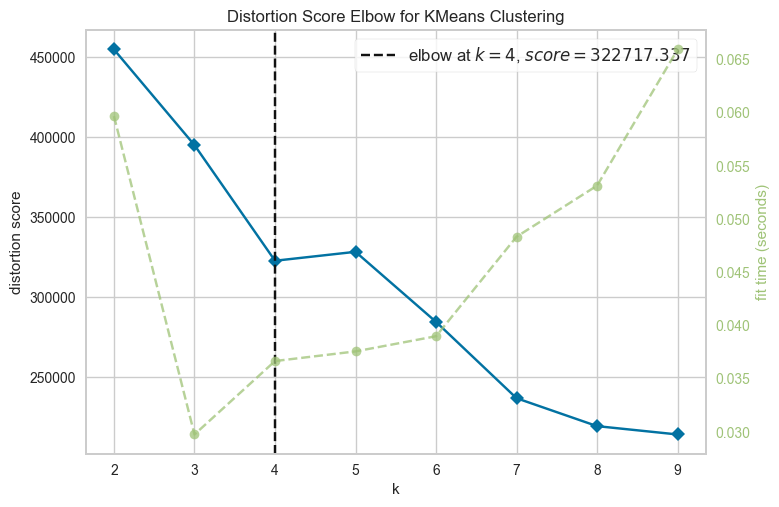

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
df_sample = df_scaled.sample(n=50000)
model = KMeans()
visualizer =  KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_sample)
visualizer.show()

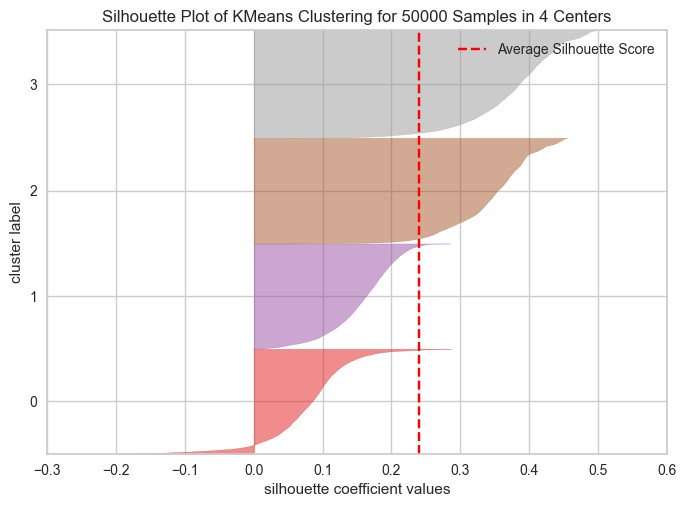

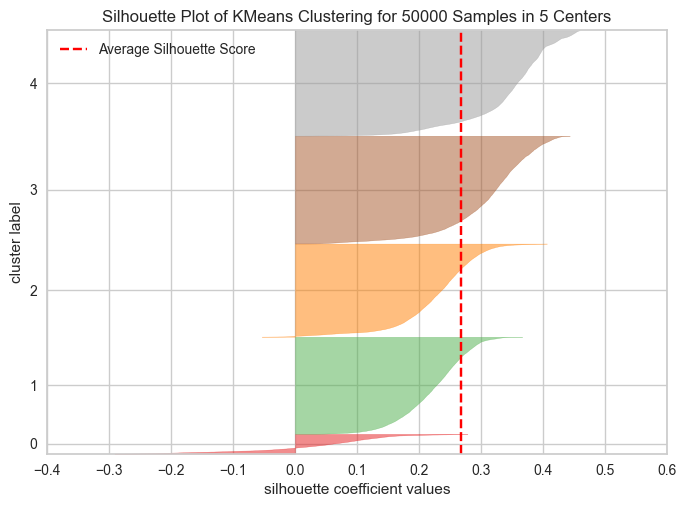

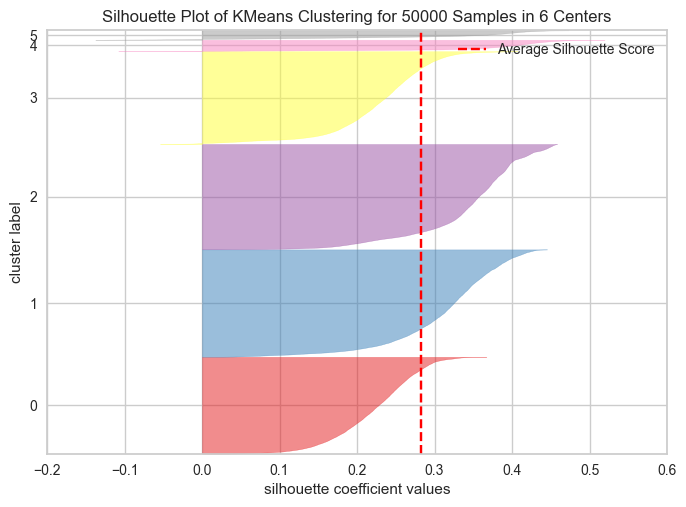

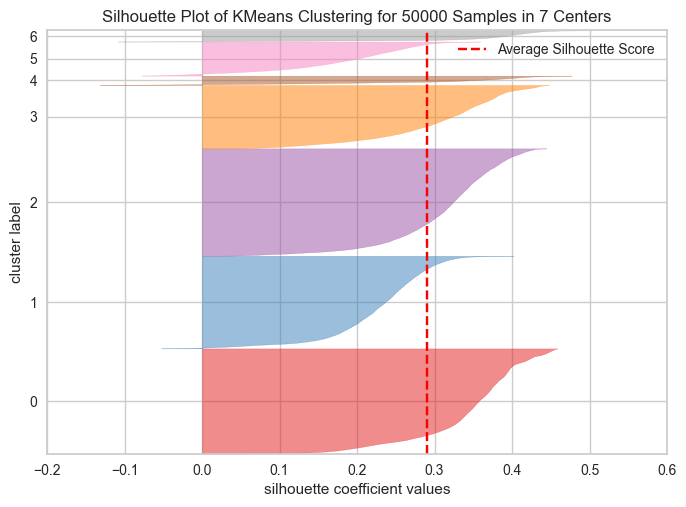

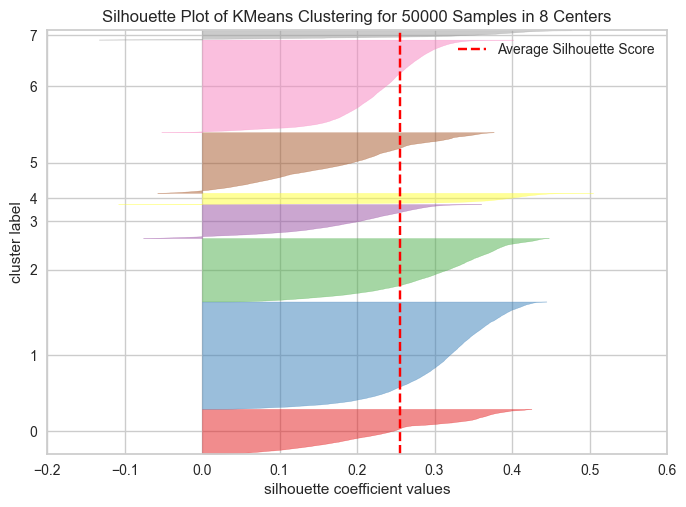

In [42]:
for i in range(4, 9):
  model = KMeans(i)
  visualizer =  SilhouetteVisualizer(model)
  visualizer.fit(df_sample)
  visualizer.show()

In [72]:
model = KMeans(7)
Y = model.fit_predict(df_scaled)
df_model.insert(6,'cluster',Y)

In [62]:
df_model.head(10)

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,cluster,Sub_area_lavanderia,Sub_area_Aq_Ar,Periodo_Dia,Periodo_Madrugada,Periodo_Noite
0,2006,4,4.22,0.42,234.84,0.00,0,1.00,17.00,True,False,False
1,2006,4,5.36,0.44,233.63,0.00,0,1.00,16.00,True,False,False
2,2006,4,5.37,0.50,233.29,0.00,0,2.00,17.00,True,False,False
3,2006,4,5.39,0.50,233.74,0.00,0,1.00,17.00,True,False,False
4,2006,4,3.67,0.53,235.68,0.00,0,1.00,17.00,True,False,False
5,2006,4,3.52,0.52,235.02,0.00,0,2.00,17.00,True,False,False
6,2006,4,3.70,0.52,235.09,0.00,0,1.00,17.00,True,False,False
7,2006,4,3.70,0.52,235.22,0.00,0,1.00,17.00,True,False,False
8,2006,4,3.67,0.51,233.99,0.00,0,1.00,17.00,True,False,False
9,2006,4,3.66,0.51,233.86,0.00,0,2.00,16.00,True,False,False


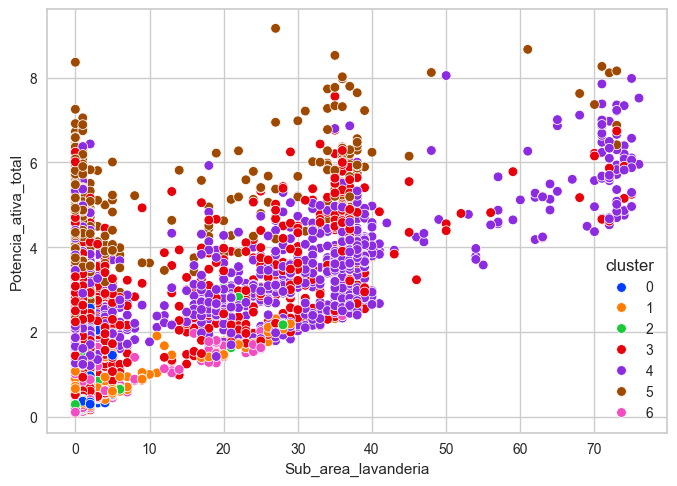

In [77]:
df_sample = df_model.sample(n=50000)
sns.scatterplot(x='Sub_area_lavanderia', y='Potencia_ativa_total', data=df_sample, hue='cluster',palette='bright')
plt.show()

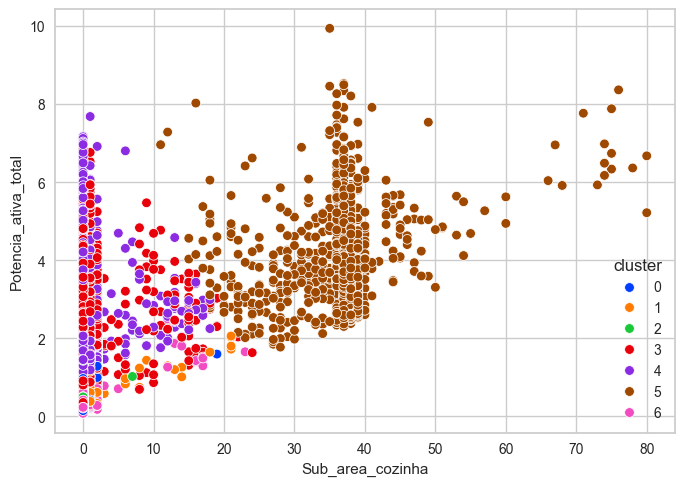

In [76]:
df_sample = df_model.sample(n=50000)
sns.scatterplot(x='Sub_area_cozinha', y='Potencia_ativa_total', data=df_sample, hue='cluster',palette='bright')
plt.show()

In [78]:
df_numerico = df_model.select_dtypes(include='number')
df_numerico.groupby('cluster').mean().astype(int)

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
cluster,,,,,,,,
0,2008,3,0,0,242,0,0,2
1,2009,2,0,0,242,0,0,0
2,2008,1,0,0,242,0,0,2
3,2008,2,1,0,240,0,1,6
4,2008,2,1,0,239,0,2,17
5,2008,2,4,0,237,36,3,11
6,2007,2,0,0,240,0,0,0


In [84]:
df_numerico = df_model.select_dtypes(include='number')
df_numerico.groupby('cluster').max().sort_values(by='Potencia_ativa_total',ascending=False).astype(int)

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
cluster,,,,,,,,
5,2010,4,11,1,249,88,76,31
4,2010,4,9,1,252,21,80,31
3,2010,4,8,1,253,25,75,31
2,2010,2,6,0,253,26,46,29
0,2010,4,5,0,252,29,39,31
6,2010,4,4,1,251,24,37,16
1,2010,4,4,1,254,27,38,21


In [86]:
df_model[df_model['cluster']==5]

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,cluster,Sub_area_lavanderia,Sub_area_Aq_Ar,Periodo_Dia,Periodo_Madrugada,Periodo_Noite
1031,2006,4,5.78,0.27,232.89,37.00,5,36.00,17.00,True,False,False
1032,2006,4,5.72,0.24,232.07,37.00,5,35.00,16.00,True,False,False
1033,2006,4,5.74,0.26,232.13,36.00,5,35.00,17.00,True,False,False
1034,2006,4,5.71,0.24,231.99,37.00,5,36.00,16.00,True,False,False
1035,2006,4,5.73,0.27,231.88,36.00,5,35.00,17.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2074573,2010,4,3.63,0.06,239.20,38.00,5,0.00,17.00,True,False,False
2074574,2010,4,3.62,0.06,238.92,37.00,5,0.00,18.00,True,False,False
2074575,2010,4,3.63,0.06,239.56,38.00,5,0.00,17.00,True,False,False
2074576,2010,4,3.55,0.06,239.84,38.00,5,0.00,18.00,True,False,False


In [88]:
df_scaled['cluster'] = Y

In [89]:
df_scaled['cluster_bin'] = df_scaled['cluster'].apply(lambda x: 0 if x != 5 else 1)

In [90]:
df_scaled.drop('cluster', axis=1, inplace=True)

In [91]:
classifier = RandomForestClassifier(n_estimators=20)

In [92]:
X = df_scaled.drop('cluster_bin', axis=1)
Y = df_scaled['cluster_bin']

In [93]:
Y.value_counts(normalize=True) * 100

cluster_bin
0   97.24
1    2.76
Name: proportion, dtype: float64

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [96]:
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [97]:
yHat = classifier.predict(x_test)

In [99]:
accuracy_score(y_test, yHat)

0.9998698729960441

In [101]:
importances = pd.DataFrame({'features': list(X.columns), 'importance': classifier.feature_importances_}).sort_values('importance', ascending=False)
importances

,features,importance
5,Sub_area_cozinha,0.80
2,Potencia_ativa_total,0.14
6,Sub_area_lavanderia,0.02
4,Tensao,0.01
7,Sub_area_Aq_Ar,0.01
3,Potencia_reativa_total,0.01
0,Ano,0.00
1,Trimestre,0.00
10,Periodo_Noite,0.00
8,Periodo_Dia,0.00


In [104]:
df_selected_columns = df_scaled[importances['features'].head(3)]
model = KMeans(4)
Y = model.fit_predict(df_selected_columns)

In [102]:
df_model1 = df_model.copy() 

In [103]:
df_model1.drop('cluster', axis=1, inplace=True)

In [105]:
df_model1['cluster'] = Y

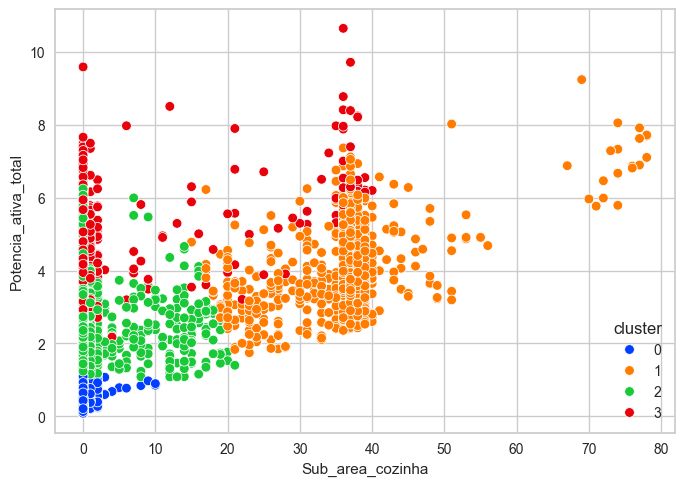

In [108]:
df_sample = df_model1.sample(n=50000)
sns.scatterplot(x='Sub_area_cozinha', y='Potencia_ativa_total', data=df_sample, hue='cluster',palette='bright')
plt.show()

In [111]:
df_numerico = df_model1.select_dtypes(include='number')
df_numerico.groupby('cluster').max().sort_values(by='Sub_area_cozinha',ascending=False).astype(int)

,Ano,Trimestre,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
cluster,,,,,,,,
1,2010,4,10,1,250,88,38,31
3,2010,4,11,1,251,44,80,31
2,2010,4,8,1,253,21,20,31
0,2010,4,1,1,254,16,16,17
